<a href="https://colab.research.google.com/github/thuyd12/Statistical-tests/blob/main/31_Statistical_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 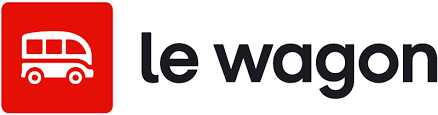

# Statistical tests

You are today Data Analyst for a real estate company. They need you to better understand what features play a role on prices.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset is real data. It contains more features than what we need but lets you pratice more in the future if you want to.

You can find data description [on this website](https://www.kaggle.com/competitions/home-data-for-ml-course/data).

## Distribution


a) Download [`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing) and import data into `df` variable.




In [ ]:
import pandas as pd

df = pd.read_csv("Iowa_housing_prices.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


b) We want to study `SalePrice` repartition.
Use Plotly Express to do so.


In [ ]:
import plotly.express as px

fig = px.histogram(df, x="SalePrice")
fig.show()

c) Is is a normal distribution? Are there any outlier ?

It's doesn't look like a normal distribution. There is a thicker distribution tail on the right. There are several exepensive houses away from the mean.

d) How do you calculate quantile with Pandas ? Calculate 10% quantile of `SalePrice` variable (the price where 10% of houses in dataset is below)

In [ ]:
df["SalePrice"].quantile(.1)

106475.0

e) Look at `histnorm` parameter of `px.histogram()` function. What does it do ? Try "probability".

We obtain a probability distribution.

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="SalePrice", histnorm='probability')
fig.show()

f) We will now use statistics to determine if data follow a normal distribution or not. 
Execute the cell below and interpret result based on p-value.

- H0 hypothesis: sample comes from a normal distribution
- H1: H0 is false

In [ ]:
from scipy import stats

# Agostino and Pearson’s test
k2, pvalue = stats.normaltest(df["SalePrice"])

print(pvalue)

2.283848353787728e-133


pvalue is very small << 5%, we reject null hypothesis. Data don't come from a normal distribution.

g) One other chart is really useful to see repartition, it is box ploting.

We want to observe relation between `OverallQual` and `SalePrice`. Create a boxplot with Plotly Express and interpret results.

In [ ]:
fig = px.box(df, x="OverallQual", y="SalePrice")
fig.show()

Overquality is a categorical dimension from 1 to 10.
We can see that higher OverallQual leads to higher House prices. 

The thing that makes this chart so powerful with Plotly Express is that for each OverallQual category we have a statistic summary of the distribution.

h) What is the third percentile of OverallQual=7 ?

Using your mouse hover the chart, it tells you 231.125K

i) What does lower and upper fence mean ? 

The lower fence is at x = Q1 - 1.5 * IQR.
The upper fence is at x = Q3 + I.5 * IQR.

The IQR is the interquartile range: IQR = Q3 - Q1.
Since the IQR is the length of the box in the boxplot,
outliers are data that is more than 1.5 boxlengths
from the boxplot box.


## Correlation

a) What does `df.corr()` do? How many features do you have ? 

Depending pandas version installed you may have only numerical features.

In [ ]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


b) As always, it's almost impossible to use those data without a proper visualisation. Use `px.imshow()` to visualize it. 

Be careful to use width and height parameters large enough to see all houses features.

In [ ]:
fig = px.imshow(df.corr(), width=800, height=800)
fig.show()

c) We can now see which feature is correlated or not with `SalePrice` but between other features as well.

What is the correlation between `Id` and `SalePrice`? Why?

Correlatio is 0 which is normal because Id is not feature but only a random number in a database. 

d) Are there any feature negatively correlated with SalePrice ?

Not really.

e) What do you think of the correlation between `GrLivArea` and `SalePrice`? Is it a surprise?

Correlation is very high almost 0.71

This is not a surprise, GrLivArea is above grade (ground) living area square feet. Bigger is a house and bigger is its price.

f) Use `px.scatter()` function to display a scatterplot between `GrLivArea` and `SalePrice`.

In [ ]:
fig = px.scatter(df, x="GrLivArea", y="SalePrice")
fig.show()

g) What does `trendline` parameter do ? 

Replot your char using it. Mouse over the chart, what do you see ?

In [ ]:
fig = px.scatter(df, x="GrLivArea", y="SalePrice", trendline="ols")
fig.show()

We can see regression parameters values. Here SalePrice = 107.18 x GrLivArea + 18569

h) **Be careful, correlation doesn't mean causality !**

It's so important to keep that in mind to not take false conclusions.

Go to [this website](https://www.tylervigen.com/spurious-correlations) and pick the most absurd correlation of your choice.

## Statistical tests

Statistical tests are useful to tell us if a difference is statistically significant.

a) Let study the impact of `Neighborhood` on `SalePrice`.

Plot a histogram of `SalePrice` and pass `Neighborhood` in color parameter. Play with the chart to visually see that some Neighborhoods have different repartition.

In [ ]:
fig = px.histogram(df, x="SalePrice", color="Neighborhood")
fig.show()

b) What statistical tests do you propose to verify statistically that there is a price difference between IDOTRR and ClearCr neighborhood?

Can we do a Ztest?

Because there are less than 30 samples, we can't use Z test.

We will do only a ttest

In [ ]:
df[df['Neighborhood'] == 'ClearCr']['SalePrice'].count()

28

c) Implement a ttest. 
What can you conclude if we accept a 5% risk?

Hint: test first if standard variation are equal to test if variances are similar 

Variances are not equal

In [ ]:
print(df[df['Neighborhood'] == 'ClearCr']['SalePrice'].std())
print(df[df['Neighborhood'] == 'IDOTRR']['SalePrice'].std())

50231.53899282105
33376.71011693228


In [ ]:
# perform test
tScore, pValue = stats.ttest_ind(df[df['Neighborhood'] == 'IDOTRR']['SalePrice'], 
                                 df[df['Neighborhood'] == 'ClearCr']['SalePrice'], 
                                 equal_var=False)

print(pValue)

2.7901189669204e-13


pvalue is way below 0.05, so we can reject the null hypothesis. 

House prices between IDOTRR and ClearCr are statiscally different.

d) We will now study the influence of `Foundation` on `SalePrice`.

Make a boxplot chart of SalesPrice over foundation.

In [ ]:
fig = px.box(df, x="Foundation", y="SalePrice")
fig.show()

e) How many samples are there per type of foundation ?

In [ ]:
df.groupby("Foundation").size()

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
dtype: int64

f) Only `Brktil`, `CBlock`and `Pconc` have enough samples to use statistical tests.

Are Houses prices significativly different among those three types of Foundation ? 
Which test should you use? What can you conclude?

In [ ]:
import scipy.stats as stats

# Perform anova test
aScore, pValue = stats.f_oneway(df[df.Foundation=="BrkTil"]["SalePrice"], 
                                df[df.Foundation=="CBlock"]["SalePrice"], 
                                df[df.Foundation=="PConc"]["SalePrice"])

print(pValue)
print(aScore)

1.6212905812533462e-88
233.7595837374714


pvalue is nearly 0, we reject null hypothesis that there is no mean difference. Foundation plays a role in houses prices.

g) Study impact of `CentralAir`- Y or N. Which test should you use ? What can you conclude?

In [ ]:
print(df[df['CentralAir'] == 'Y']['SalePrice'].std())
print(df[df['CentralAir'] == 'N']['SalePrice'].std())

78805.20682039492
40671.2739614024


In [ ]:
tScore, pValue = stats.ttest_ind(df[df['CentralAir'] == 'Y']['SalePrice'], 
                                 df[df['CentralAir'] == 'N']['SalePrice'], 
                                 equal_var=False)

print(pValue)

2.280814388186851e-37


Definitely, `CentralAir` plays a role in houses prices.

h) Study impact of `LotConfig` - Inside or Corner. Which test should you use ? What can you conclude if we accept a maximum risk of 5%?

In [ ]:
print(df[df['LotConfig'] == 'Inside']['SalePrice'].std())
print(df[df['LotConfig'] == 'Corner']['SalePrice'].std())

76426.80578739099
84466.04122160583


In [ ]:
import scipy.stats as stats

tScore, pValue = stats.ttest_ind(df[df['LotConfig'] == 'Inside']['SalePrice'], 
                                 df[df['LotConfig'] == 'Corner']['SalePrice'], 
                                 equal_var=False)

print(pValue)

0.41295943395335377


If we take a maximum risk of 5%, pValue > 5% then we accept null hypothesis. There is no difference in houses prices means between Inside and Corner. This feature doesn't play a significant role.

i) If we now accept a maximum risk of 42%, is the conclusion different?

Yes because pValue < 42%, but 42% is almost 50%. It's like taking a random decision.

j) Read [this article](https://www.nature.com/articles/d41586-019-00857-9) on why we shouldn't use only 5% risk but it's more a question on how much risk we are willing to take.

k) Dabl is a handy library that allows you to quickly visualize the relationships of all features. It shows only top 10 features but worth it for small dataset or you need to slice your data.

Execute cells below and observe charts.

PS: you migh restart your kernel to be able to see the result

In [ ]:
!pip install dabl
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:679: UserWarning: Dropped 2 outliers in column SalePrice.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:652: UserWarning: Discarding 2 outliers in target column.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:111: UserWarning: Showing only top 10 continuous features.
  warn("Showing only top 10 continuous features.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Showing only top 10 of 44 categorical features


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='SalePrice', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=8.09E-01'}, xlabel='OverallQual (jittered)', ylabel='SalePrice'>,
         <AxesSubplot:title={'center':'F=7.30E-01'}, xlabel='GrLivArea'>,
         <AxesSubplot:title={'center':'F=6.53E-01'}, xlabel='YearBuilt'>,
         <AxesSubplot:title={'center':'F=6.48E-01'}, xlabel='GarageArea'>,
         <AxesSubplot:title={'center':'F=6.01E-01'}, xlabel='TotalBsmtSF'>],
        [<AxesSubplot:title={'center':'F=5.94E-01'}, xlabel='GarageYrBlt', ylabel='SalePrice'>,
         <AxesSubplot:title={'center':'F=5.74E-01'}, xlabel='1stFlrSF'>,
         <AxesSubplot:title={'center':'F=5.72E-01'}, xlabel='YearRemodAdd'>,
         <AxesSubplot:title={'center':'F=5.31E-01'}, xlabel='TotRmsAbvGrd (jittered)'>,
         <AxesSubplot:title={'center':'F=4.77E-01'}, xlabel='OpenPorchSF'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.28E-01'}, xlabel='Sal

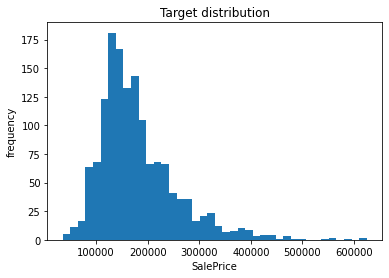

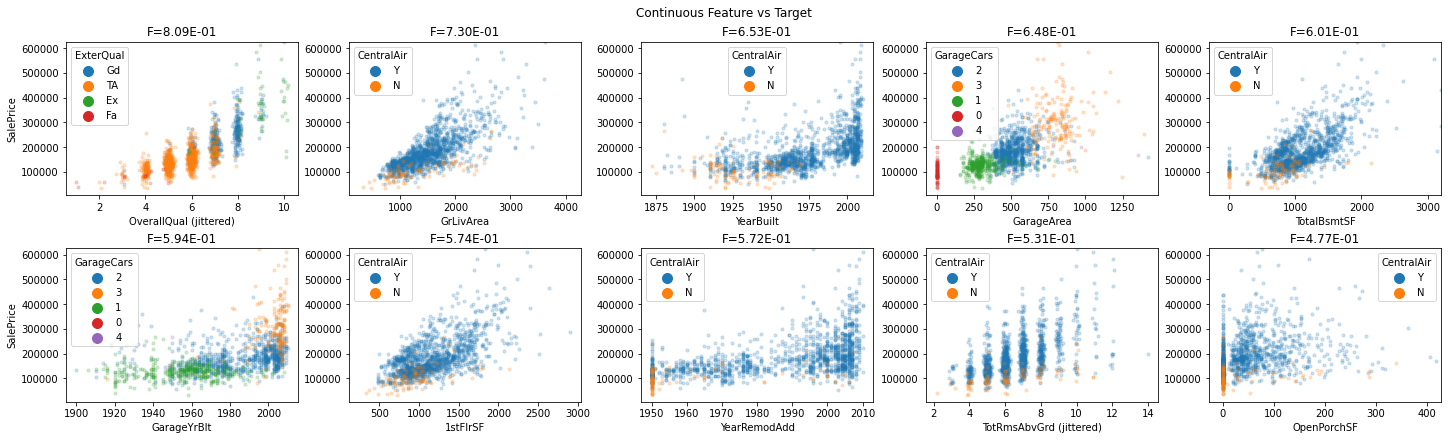

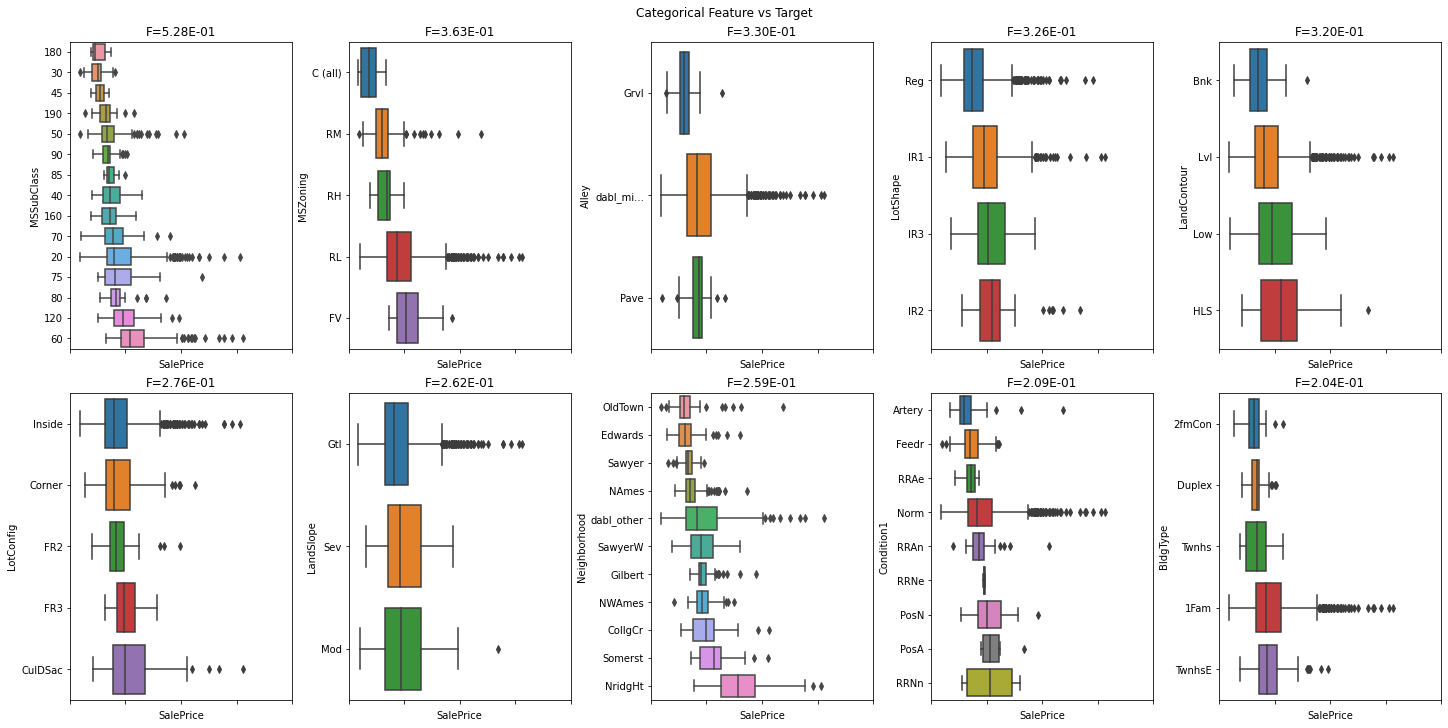

In [ ]:
import dabl

dabl.plot(df, target_col = 'SalePrice', verbose=100)